<a href="https://colab.research.google.com/github/Laleeth/Deep-learning-projects/blob/master/Breast-cancer-risk-prediction-master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125139 bytes


In [8]:
import pandas as pd
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Benign 357
Malignanat 212


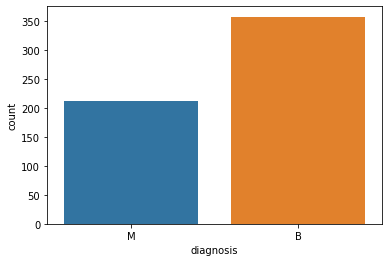

In [9]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'],label='Count')
B,M =data['diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
X = data.iloc[:,2:].values
y = data.iloc[:,1].values


In [0]:

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y=labelencoder_X_1.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

#Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [15]:
X_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [16]:
!pip install keras

In [17]:
import keras 
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [19]:
#Adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30))

#Adding second hidden layer
classifier.add(Dense(output_dim=16,init='uniform',activation='relu'))

#Adding output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [23]:
classifier.fit(X_train,y_train,batch_size=100,nb_epoch=200)

Epoch 1/200
512/512 [==============================] - 0s 31us/step - loss: 0.0329 - accuracy: 0.9922
Epoch 2/200
512/512 [==============================] - 0s 24us/step - loss: 0.0327 - accuracy: 0.9922
Epoch 3/200
512/512 [==============================] - 0s 24us/step - loss: 0.0325 - accuracy: 0.9922
Epoch 4/200
512/512 [==============================] - 0s 25us/step - loss: 0.0323 - accuracy: 0.9922
Epoch 5/200
512/512 [==============================] - 0s 21us/step - loss: 0.0321 - accuracy: 0.9922
Epoch 6/200
512/512 [==============================] - 0s 22us/step - loss: 0.0318 - accuracy: 0.9922
Epoch 7/200
512/512 [==============================] - 0s 22us/step - loss: 0.0316 - accuracy: 0.9922
Epoch 8/200
512/512 [==============================] - 0s 23us/step - loss: 0.0315 - accuracy: 0.9922
Epoch 9/200
512/512 [==============================] - 0s 23us/step - loss: 0.0313 - accuracy: 0.9922
Epoch 10/200
512/512 [==============================] - 0s 20us/step - loss: 0.031

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


512/512 [==============================] - 0s 26us/step - loss: 0.0299 - accuracy: 0.9922
Epoch 17/200
512/512 [==============================] - 0s 20us/step - loss: 0.0296 - accuracy: 0.9922
Epoch 18/200
512/512 [==============================] - 0s 22us/step - loss: 0.0294 - accuracy: 0.9922
Epoch 19/200
512/512 [==============================] - 0s 23us/step - loss: 0.0294 - accuracy: 0.9922
Epoch 20/200
512/512 [==============================] - 0s 23us/step - loss: 0.0292 - accuracy: 0.9922
Epoch 21/200
512/512 [==============================] - 0s 20us/step - loss: 0.0290 - accuracy: 0.9922
Epoch 22/200
512/512 [==============================] - 0s 22us/step - loss: 0.0289 - accuracy: 0.9922
Epoch 23/200
512/512 [==============================] - 0s 22us/step - loss: 0.0285 - accuracy: 0.9922
Epoch 24/200
512/512 [==============================] - 0s 20us/step - loss: 0.0283 - accuracy: 0.9922
Epoch 25/200
512/512 [==============================] - 0s 24us/step - loss: 0.0280 - 

In [0]:
#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred =(y_pred > 0.5)

In [0]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

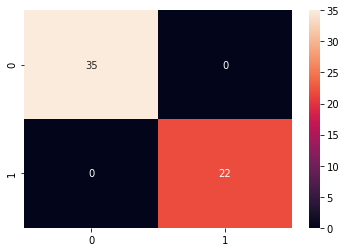

In [28]:
sns.heatmap(cm,annot=True)
plt.savefig('cancer.png')